## Loan Data Analysis 

**Team:**
* Yongsheng Lin 

**Course:** CISD 43 – BIG DATA (Spring, 2024)

### Problem Statement
* This project is loan data analysis.

### Required packages and perform EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("loan_data.csv")

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
data.rename(columns={
    'credit.policy': 'CreditPolicy',
    'purpose': 'Purpose',
    'int.rate': 'InterestRate',
    'installment': 'Installment',
    'log.annual.inc': 'LogAnnualIncome',
    'dti': 'DebtToIncome',
    'fico': 'FICO',
    'days.with.cr.line': 'DaysWithCreditLine',
    'revol.bal': 'RevolvingBalance',
    'revol.util': 'RevolvingUtilization',
    'inq.last.6mths': 'InquiriesLast6Months',
    'delinq.2yrs': 'DelinquenciesLast2Years',
    'pub.rec': 'PublicRecords',
    'not.fully.paid': 'NotFullyPaid'
}, inplace=True)
data.head()

,CreditPolicy,Purpose,InterestRate,Installment,LogAnnualIncome,DebtToIncome,FICO,DaysWithCreditLine,RevolvingBalance,RevolvingUtilization,InquiriesLast6Months,DelinquenciesLast2Years,PublicRecords,NotFullyPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


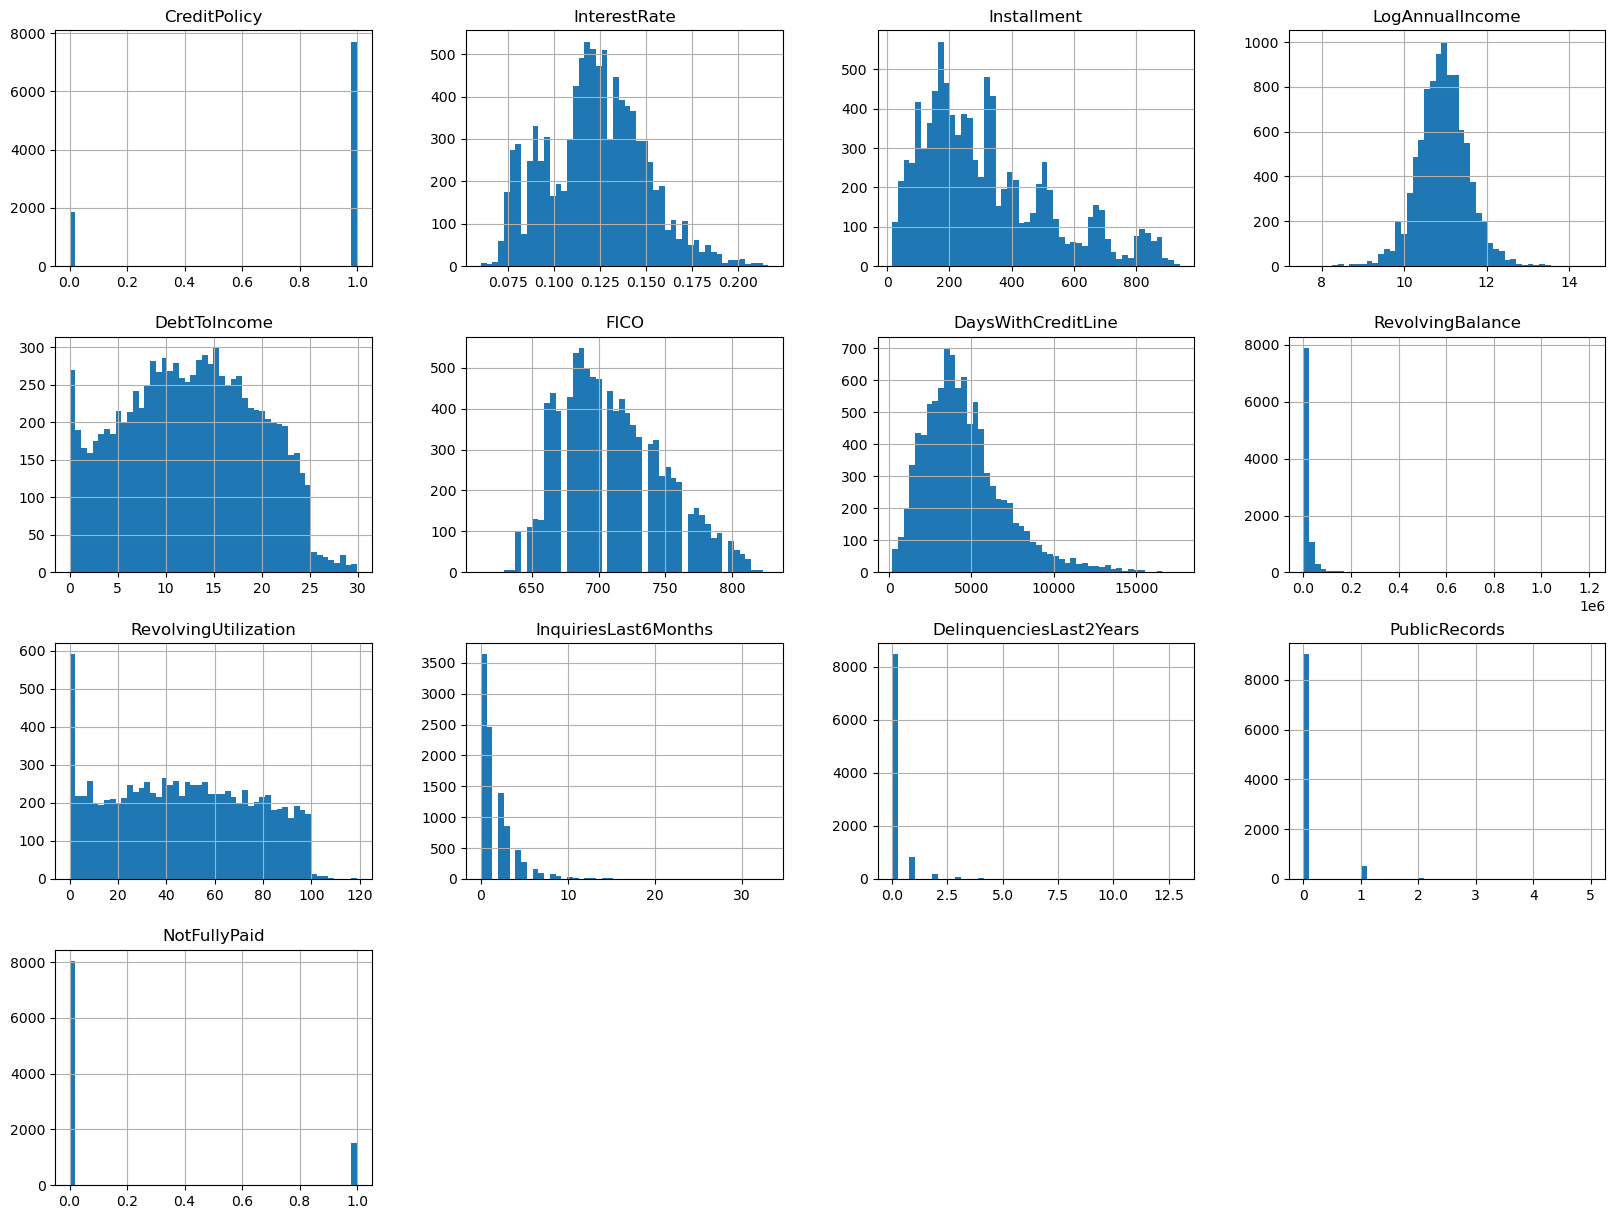

In [8]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

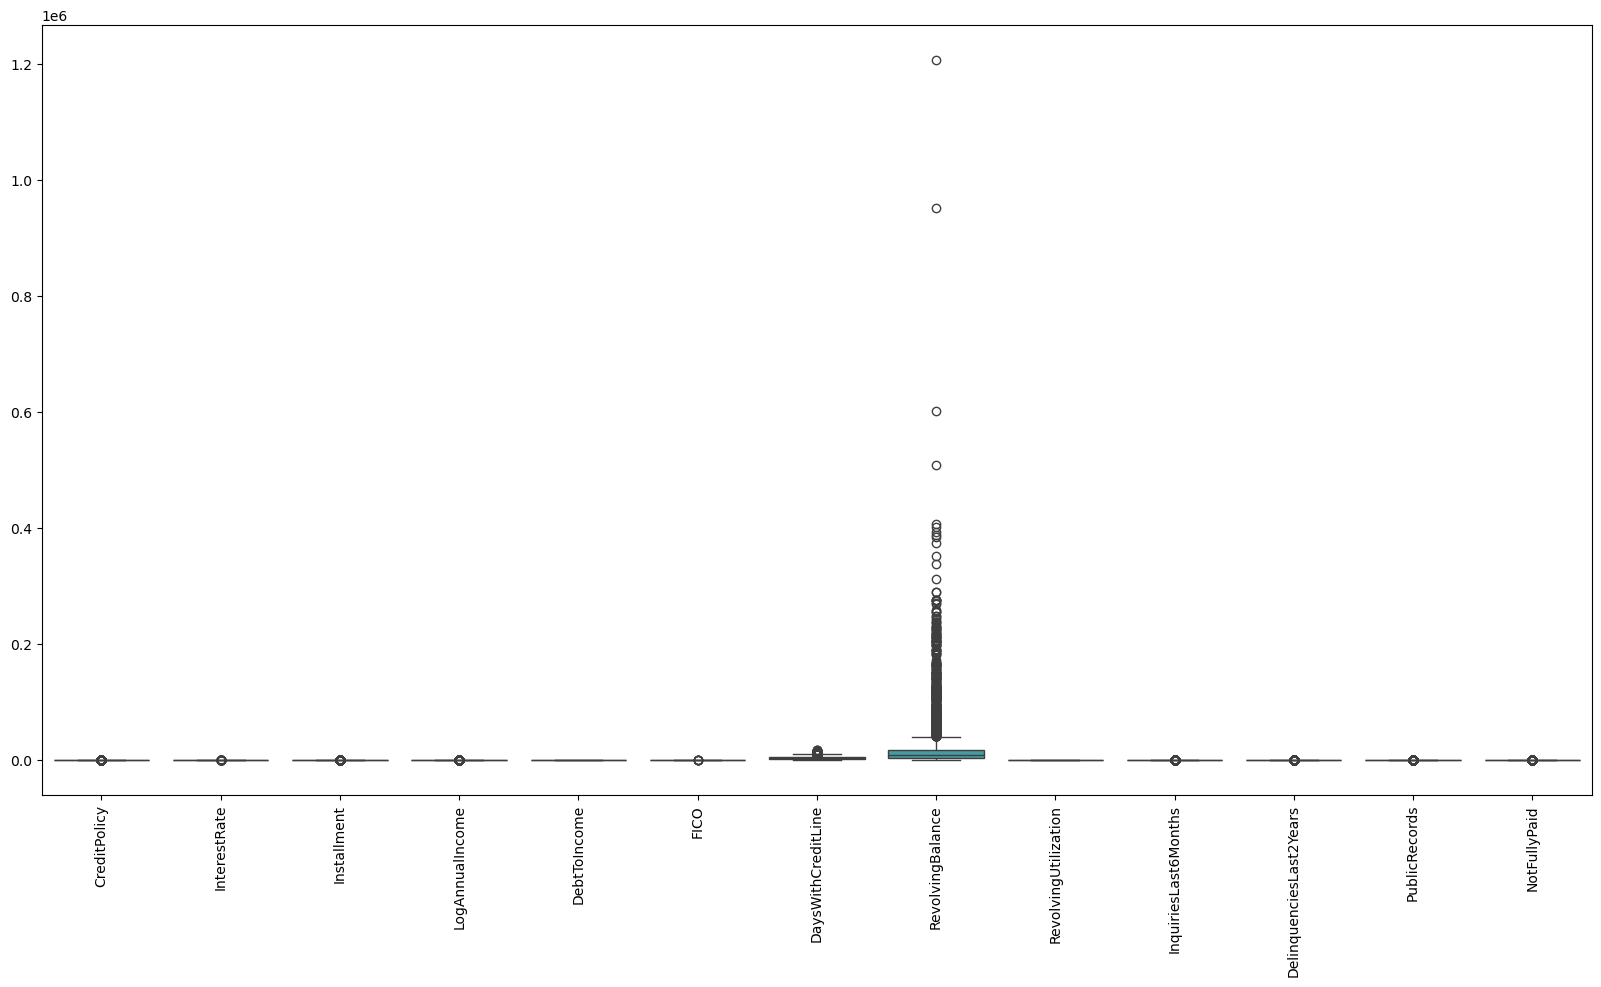

In [9]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [10]:
#Adjust the Purpose column just for correlateion analysis
data_encoded = pd.get_dummies(data, columns=['Purpose'])
data_encoded.head()

,CreditPolicy,InterestRate,Installment,LogAnnualIncome,DebtToIncome,FICO,DaysWithCreditLine,RevolvingBalance,RevolvingUtilization,InquiriesLast6Months,DelinquenciesLast2Years,PublicRecords,NotFullyPaid,Purpose_all_other,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


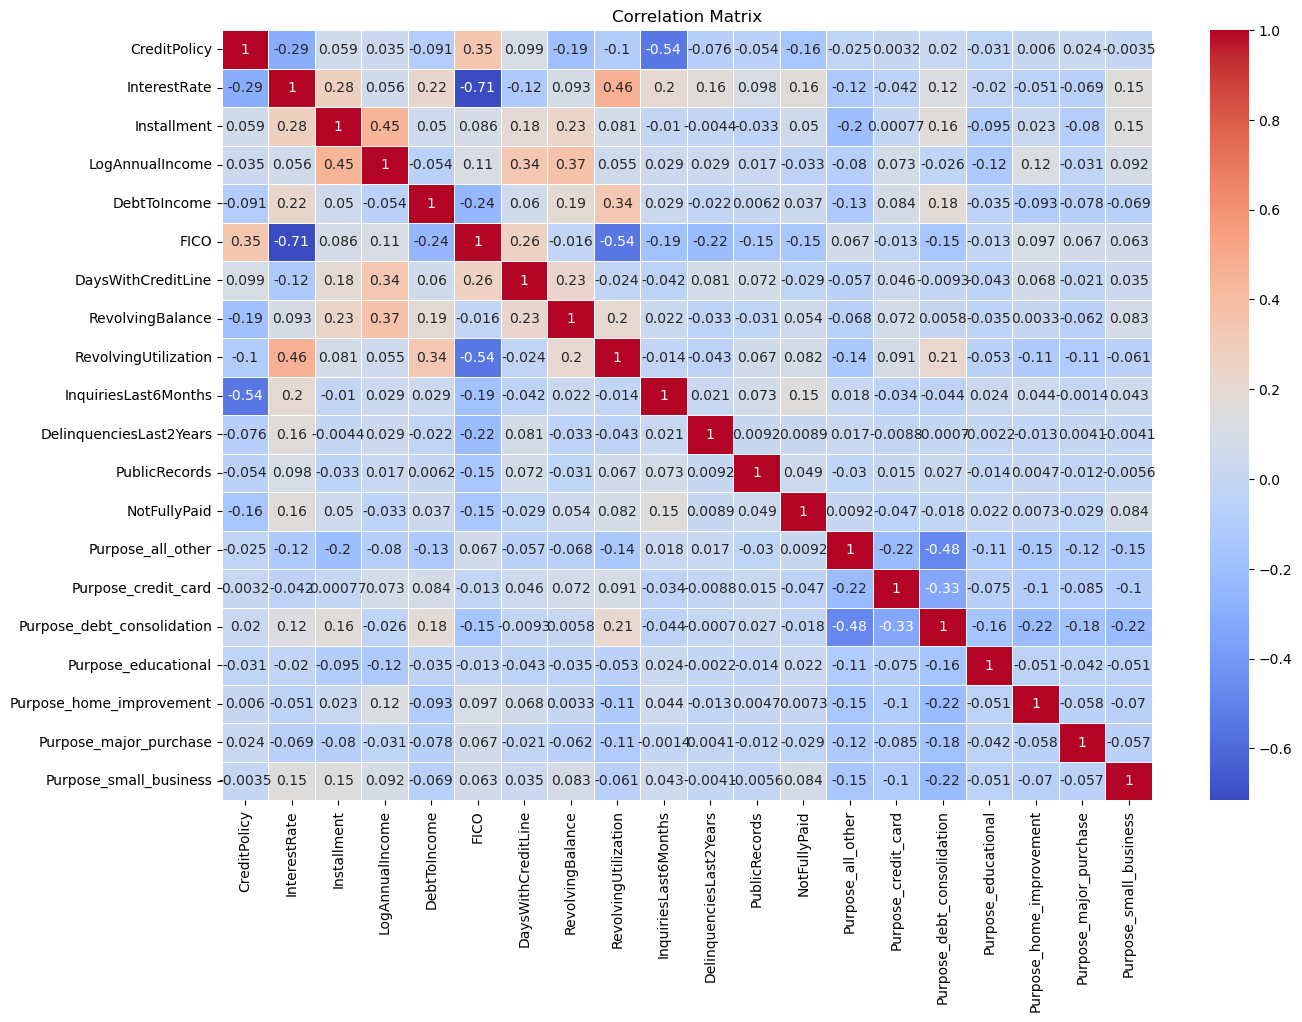

In [11]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Machine Learning 

## After performing EDA notice that the dataset contains several numerical features (interest rate, installment, log.annual.inc, etc.) that are suitable for distance-based clustering methods like K-means. ## 

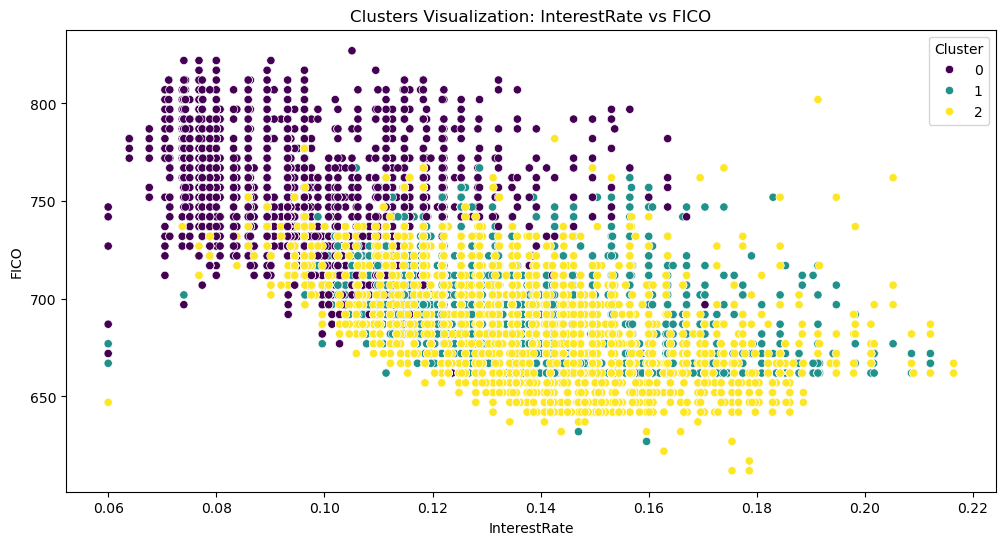

In [12]:
df = data

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

df['Cluster'] = kmeans.labels_

feature1 = 'InterestRate'
feature2 = 'FICO'

plt.figure(figsize=(12, 6))
sns.scatterplot(x=feature1, y=feature2, hue='Cluster', data=df, palette='viridis')
plt.title(f'Clusters Visualization: {feature1} vs {feature2}')
plt.show()

### Conclusions


The scatter plot shows the clustering results based on interest rate and FICO score. Each point represents a loan record, colored according to its cluster label. Lower FICO scores and higher interest rates are grouped differently compared to higher FICO scores and lower interest rates.

Cluster Characteristics:

-  Cluster 0 : Contains records with generally higher FICO scores and lower interest rates.
-  Cluster 1 : Might represent a mix of mid-range FICO scores and varying interest rates.
-  Cluster 2 : Likely includes records with lower FICO scores and higher interest rates.

Final Analysis :

* Risk Profiles: The clustering might indicate different risk profiles for loans. For example, lower FICO scores and higher interest rates could suggest higher-risk loans.
* Interest Rate Distribution: The distribution of interest rates within each cluster can provide insights into how lenders adjust interest rates based on credit scores.